In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
base_path = ".."
sys.path.append(f"{base_path}")
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib as mpl
from itertools import combinations

from utils.gnn_utils import *
from utils.utils import calc_mean_corr_df, calc_mean_rmse_df

In [3]:
experiment_dir = f"{base_path}/experiments"
experiment_name = "experiment_mouse_st"
experiment_path = f"{experiment_dir}/{experiment_name}"

In [4]:
# load sample names and celltype names
celltypes = load_celltypes(f"{experiment_path}/datasets/celltypes.txt")
sample_names = load_sample_names(f"{experiment_path}/datasets/sample_names.txt")

In [5]:
sc_data = sc.read_h5ad("../data/single-cell/Allenbrain_forSimulation_uniquect.h5ad")

st_data, X_real, X_real_train, X_sim, y_sim = load_data(
    st_path="../data/spatial/V1_Mouse_Brain_Sagittal_Anterior.h5ad",
    gene_expr_path=f"{experiment_path}/datasets",
)

/root/miniconda3/envs/dissect_spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## Load original DISSECT results

In [8]:
# load celltype abundance data
results_per_seed = []
for i in range(5):
    df = pd.read_csv(
        f"{experiment_path}/dissect_fractions_{i}.txt", index_col=0, delimiter="\t"
    )
    results_per_seed.append(df)
ensemble_result = pd.read_csv(
    f"{experiment_path}/dissect_fractions_ens.txt", index_col=0, delimiter="\t"
)


In [9]:
# compare each against each other and put into boxplot

for df_1, df_2 in combinations(results_per_seed, 2):
    mean_corr, corrs = calc_mean_corr_df(df_1, df_2, verbose=1)
    mean_rmse, rmses = calc_mean_rmse_df(df_1, df_2, verbose=1)

Mean Correlation: 0.7704133561629878
Mean RMSE: 0.02723992633689719
Mean Correlation: 0.7618908387229283
Mean RMSE: 0.027236602738221462
Mean Correlation: 0.7621013016274221
Mean RMSE: 0.02939728874616987
Mean Correlation: 0.7715356181614794
Mean RMSE: 0.02841286155113554
Mean Correlation: 0.7828585401919359
Mean RMSE: 0.026506627377730463
Mean Correlation: 0.7745168086251439
Mean RMSE: 0.027414169111669037
Mean Correlation: 0.790918309500849
Mean RMSE: 0.026215231465600092
Mean Correlation: 0.7764826901133073
Mean RMSE: 0.028638402188841595
Mean Correlation: 0.7951080785639154
Mean RMSE: 0.027467655682134554
Mean Correlation: 0.7707174593747635
Mean RMSE: 0.028086212163957087


## Load new results

In [11]:
new_result = pd.read_csv(f"{experiment_path}/new_predictions.csv", index_col=0)

In [12]:
for result in results_per_seed:
    mean_corr, corrs = calc_mean_corr_df(result, new_result, verbose=1)
    mean_rmse, rmses = calc_mean_rmse_df(result, new_result, verbose=1)

Mean Correlation: 0.7622522793263479
Mean RMSE: 0.027395974897510306
Mean Correlation: 0.7795420567646809
Mean RMSE: 0.02788782875522545
Mean Correlation: 0.7708671654019928
Mean RMSE: 0.02799819302439017
Mean Correlation: 0.7640760933681858
Mean RMSE: 0.030200012658562182
Mean Correlation: 0.772227805527454
Mean RMSE: 0.027314465920065884


Astro        CR      Endo    L23 IT        L4  \
AAACAAGTATCTCCCA-1  0.059865  0.022967  0.023117  0.007101  0.013237   
AAACACCAATAACTGC-1  0.091000  0.028096  0.030191  0.012169  0.060538   
AAACAGAGCGACTCCT-1  0.023169  0.011937  0.005515  0.368028  0.131100   
AAACAGCTTTCAGAAG-1  0.009573  0.004780  0.010358  0.015120  0.015618   
AAACAGGGTCTATATT-1  0.008353  0.000827  0.002671  0.006128  0.000986   
...                      ...       ...       ...       ...       ...   
TTGTGTTTCCCGAAAG-1  0.023698  0.005724  0.004770  0.022324  0.023281   
TTGTTCAGTGTGCTAC-1  0.023715  0.026086  0.017500  0.026234  0.250923   
TTGTTGTGTGTCAAGA-1  0.022901  0.002515  0.005325  0.028418  0.006553   
TTGTTTCACATCCAGG-1  0.066481  0.058637  0.041844  0.025824  0.018720   
TTGTTTCCATACAACT-1  0.131995  0.032287  0.017405  0.028181  0.019342   

                       L5 IT     L5 PT     L6 CT     L6 IT       L6b  ...  \
AAACAAGTATCTCCCA-1  0.031467  0.045613  0.009192  0.031085  0.019054  ...   
AAACACCAATAACTGC-1  0.025553  0.026227  0.004155  0.024872  0.073781  ...   
AAACAGAGCGACTCCT-1  0.043603  0.046196  0.021692  0.029184  0.036118  ...   
AAACAGCTTTCAGAAG-1  0.021648  0.010108  0.023914  0.028050  0.028848  ...   
AAACAGGGTCTATATT-1  0.001440  0.005888  0.001471  0.029809  0.005368  ...   
...                      ...       ...       ...       ...       ...  ...   
TTGTGTTTCCCGAAAG-1  0.039099  0.016886  0.064508  0.495854  0.072421  ...   
TTGTTCAGTGTGCTAC-1  0.269871  0.032928  0.031828  0.023960  0.034818  ...   
TTGTTGTGTGTCAAGA-1  0.034273  0.017591  0.085926  0.511613  0.058811  ...   
TTGTTTCACATCCAGG-1  0.095481  0.056123  0.031351  0.044231  0.033439  ...   
TTGTTTCCATACAACT-1  0.018128  0.111587  0.038914  0.045941  0.073027  ...   

                          NP     Oligo      Peri  Pvalb_celltype       SMC  \
AAACAAGTATCTCCCA-1  0.029351  0.208612  0.019699        0.087049  0.019082   
AAACACCAATAACTGC-1  0.124546  0.036524  0.040761        0.142376  0.009319   
AAACAGAGCGACTCCT-1  0.009523  0.015853  0.020942        0.031702  0.006061   
AAACAGCTTTCAGAAG-1  0.031880  0.038844  0.002641        0.038411  0.001937   
AAACAGGGTCTATATT-1  0.011604  0.029147  0.003213        0.007569  0.000806   
...                      ...       ...       ...             ...       ...   
TTGTGTTTCCCGAAAG-1  0.019363  0.039124  0.019988        0.008982  0.006693   
TTGTTCAGTGTGCTAC-1  0.024548  0.044225  0.012186        0.018219  0.004569   
TTGTTGTGTGTCAAGA-1  0.015602  0.073192  0.012151        0.013256  0.005602   
TTGTTTCACATCCAGG-1  0.079925  0.058532  0.025508        0.027932  0.015062   
TTGTTTCCATACAACT-1  0.051311  0.035228  0.014896        0.009821  0.012141   

                    Serpinf1_celltype  Sncg_celltype  Sst_celltype      VLMC  \
AAACAAGTATCTCCCA-1           0.017564       0.083768      0.072071  0.029784   
AAACACCAATAACTGC-1           0.053463       0.013997      0.033251  0.021417   
AAACAGAGCGACTCCT-1           0.070841       0.011318      0.035196  0.008254   
AAACAGCTTTCAGAAG-1           0.025797       0.013377      0.014732  0.006144   
AAACAGGGTCTATATT-1           0.015908       0.004689      0.006386  0.001083   
...                               ...            ...           ...       ...   
TTGTGTTTCCCGAAAG-1           0.036926       0.014888      0.022756  0.008997   
TTGTTCAGTGTGCTAC-1           0.019958       0.020392      0.050587  0.009722   
TTGTTGTGTGTCAAGA-1           0.038293       0.007692      0.011610  0.007546   
TTGTTTCACATCCAGG-1           0.045828       0.018724      0.036813  0.033167   
TTGTTTCCATACAACT-1           0.026346       0.036068      0.018932  0.029936   

                    Vip_celltype  
AAACAAGTATCTCCCA-1      0.046045  
AAACACCAATAACTGC-1      0.043092  
AAACAGAGCGACTCCT-1      0.026867  
AAACAGCTTTCAGAAG-1      0.019795  
AAACAGGGTCTATATT-1      0.020708  
...                          ...  
TTGTGTTTCCCGAAAG-1      0.013407  
TTGTTCAGTGTGCTAC-1      0.028211  
TTGTTGTGTGTCAAGA-1  

## Evaluate results

### Predicted max celltype per spot

In [ ]:
for k, df in enumerate(results_per_seed):
    max_celltypes = df.idxmax(axis=1)
    st_data.obs[f"celltype-{k}"] = max_celltypes
    sq.pl.spatial_scatter(st_data, color=f"celltype-{k}")

### Celltype distribution across tissue

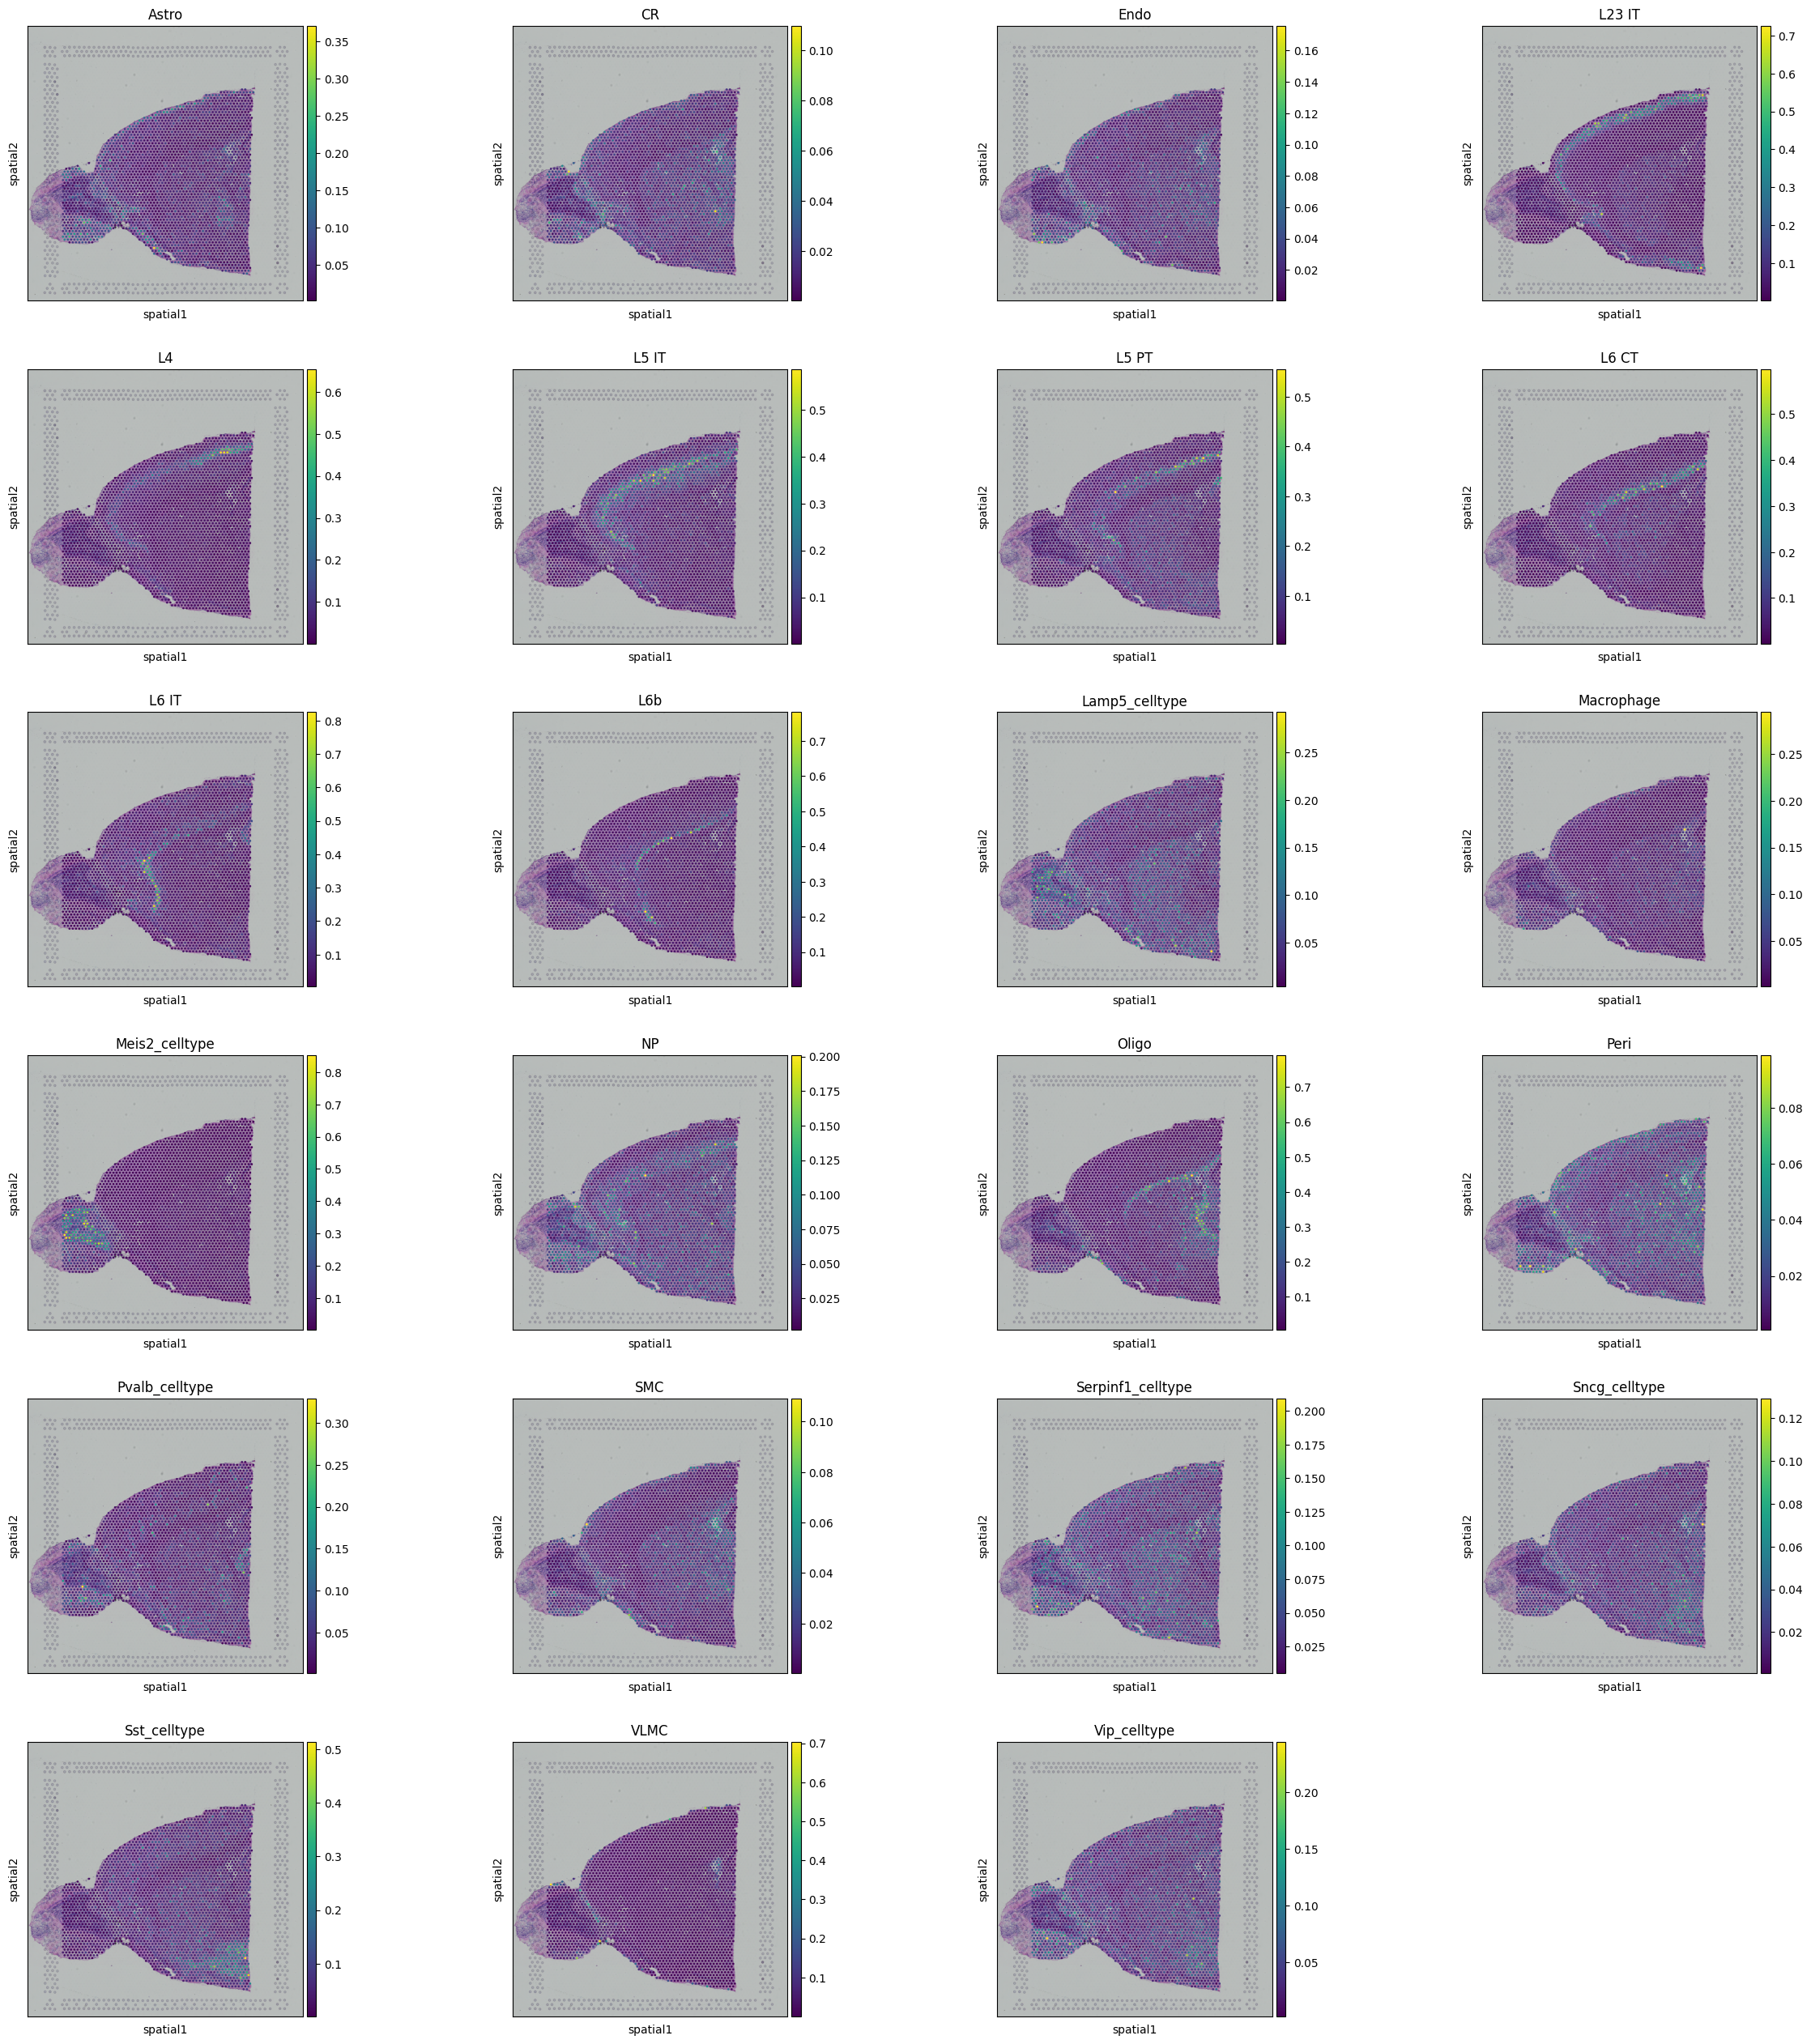

In [15]:
st_data.obs[celltypes] = new_result[celltypes]
sq.pl.spatial_scatter(st_data, color=celltypes)

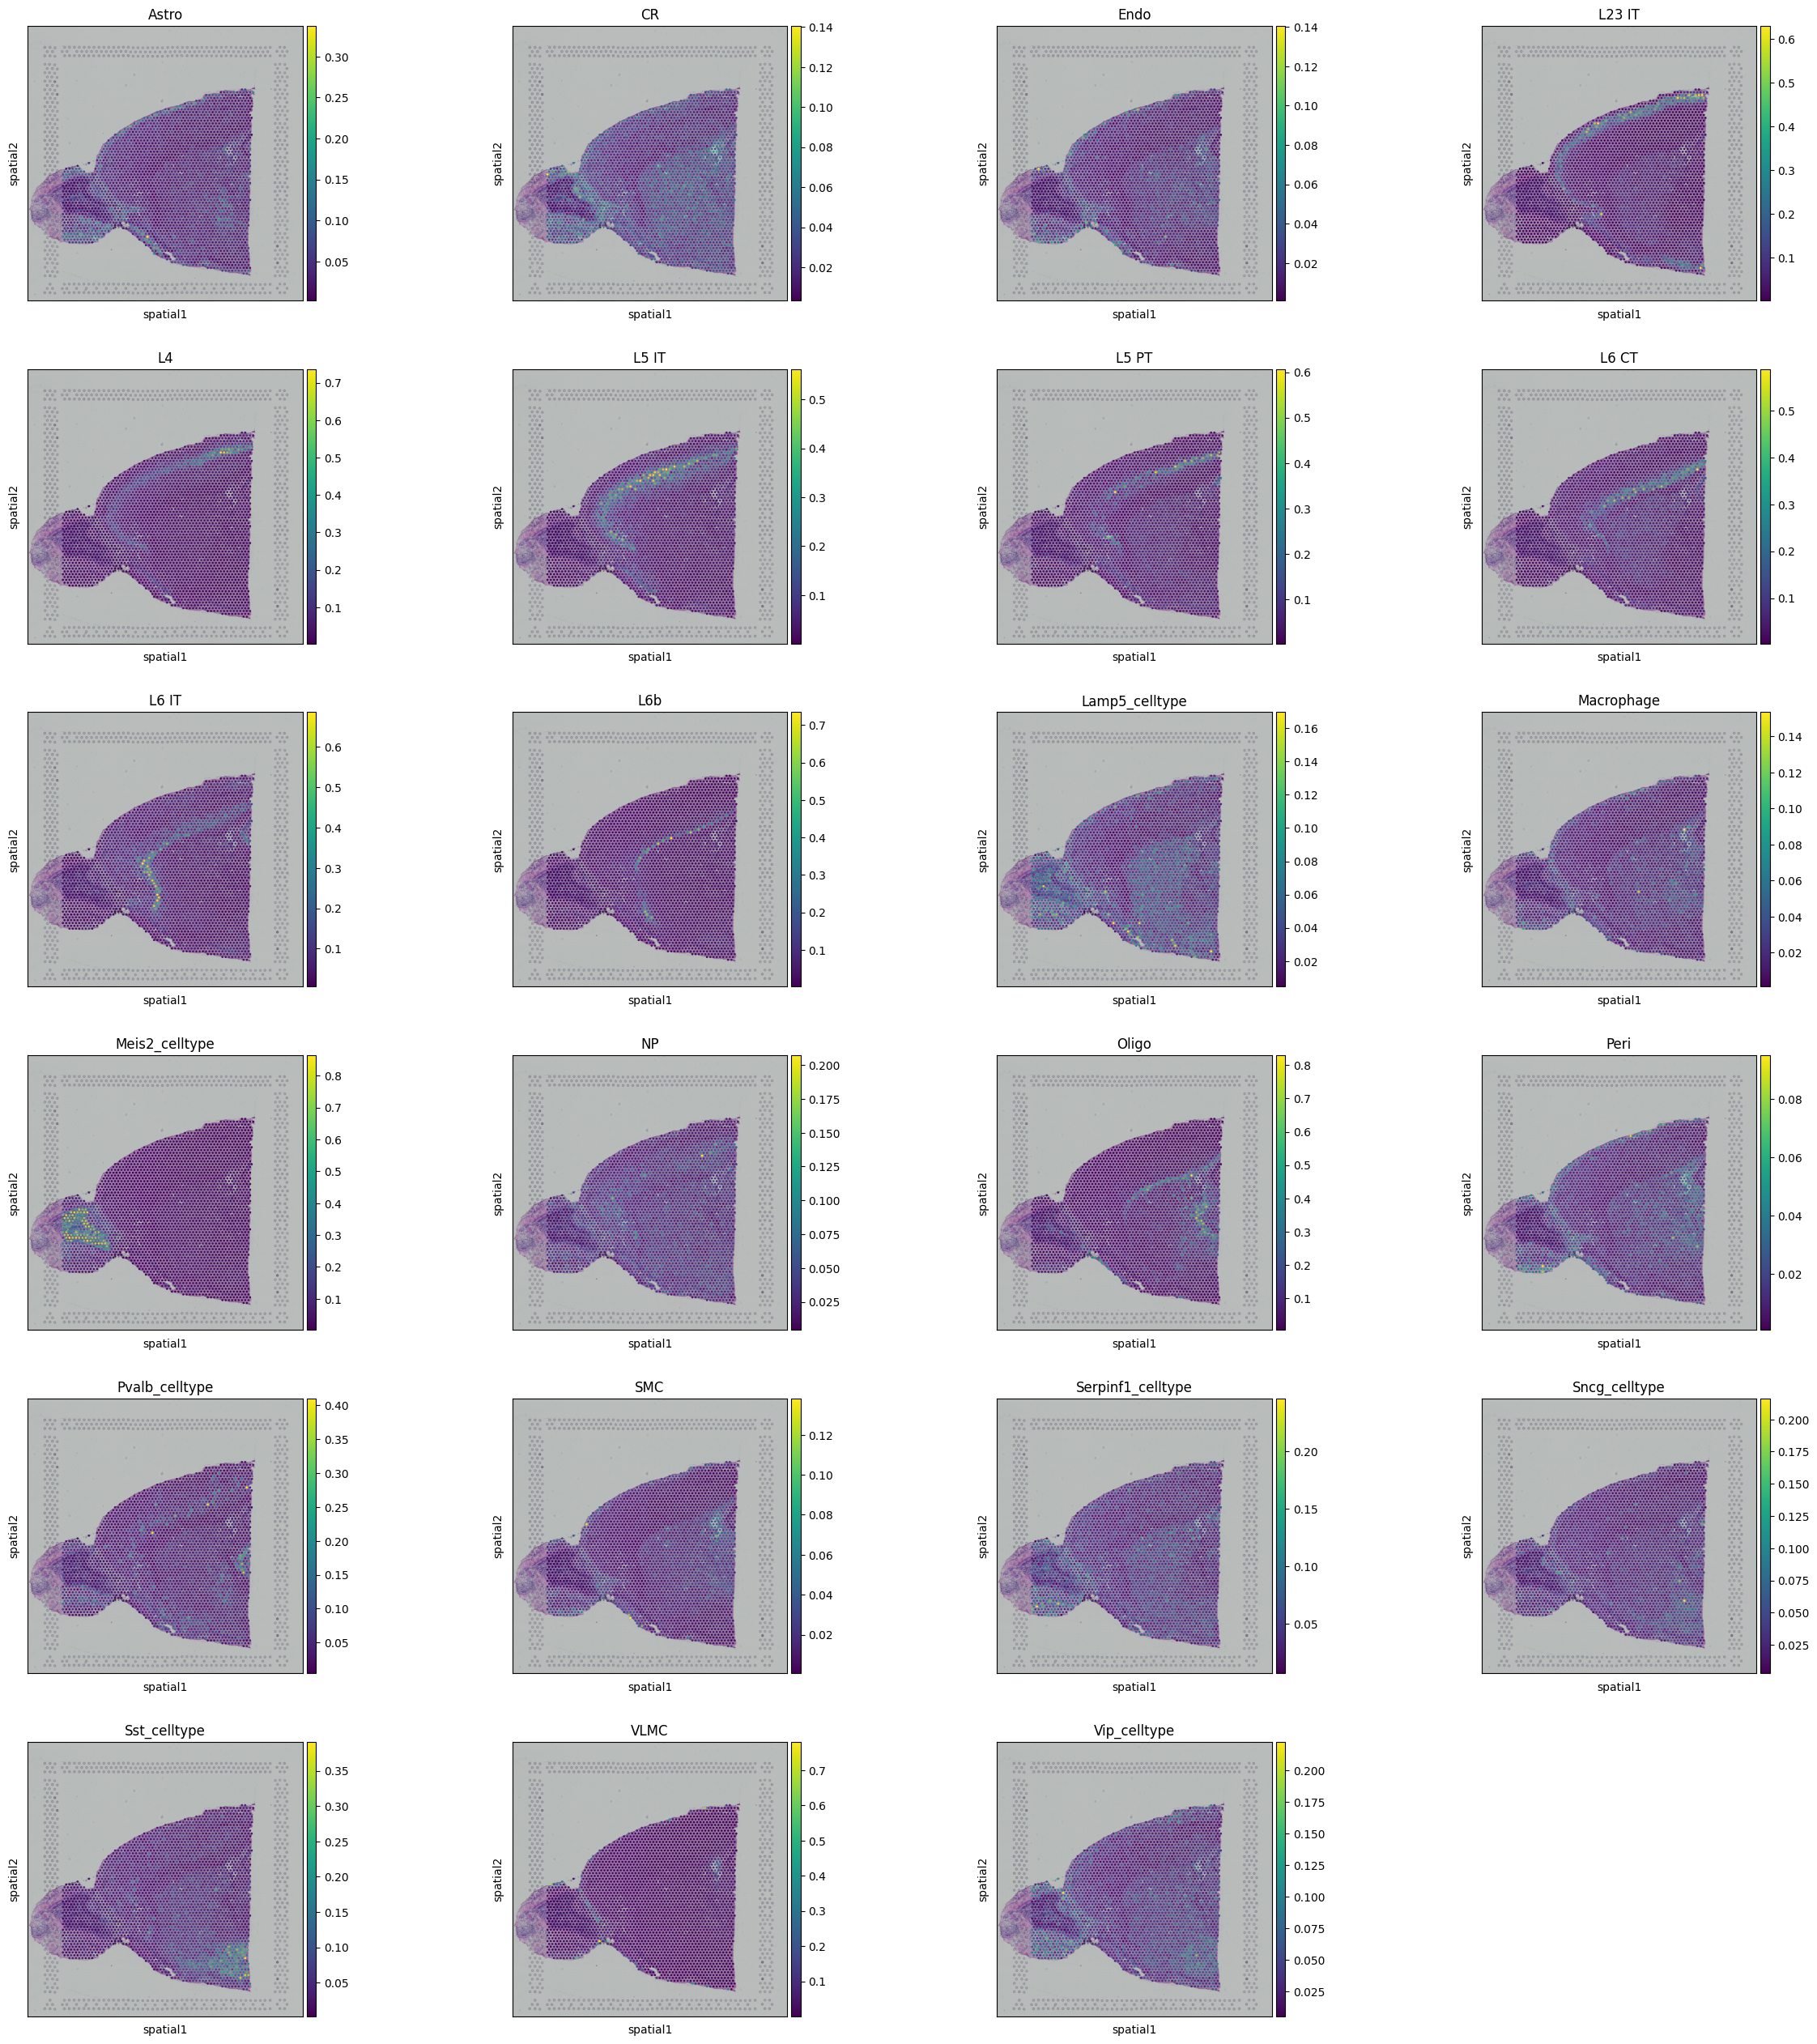

In [16]:
st_data.obs[celltypes] = ensemble_result[celltypes]
sq.pl.spatial_scatter(st_data, color=celltypes)

### Comparison between dissect runs for different seeds

In [17]:
all_corrs = []
for df_1 in results_per_seed:
    for df_2 in results_per_seed:
        all_corrs.append(calc_mean_corr_df(df_1, df_2, verbose=1)[0])
    # calc correlation
all_corrs = np.reshape(all_corrs, (5, 5))

Mean Correlation: 1.0
Mean Correlation: 0.7704133561629878
Mean Correlation: 0.7618908387229283
Mean Correlation: 0.7621013016274221
Mean Correlation: 0.7715356181614794
Mean Correlation: 0.7704133561629878
Mean Correlation: 1.0
Mean Correlation: 0.7828585401919359
Mean Correlation: 0.7745168086251439
Mean Correlation: 0.790918309500849
Mean Correlation: 0.7618908387229283
Mean Correlation: 0.7828585401919359
Mean Correlation: 1.0
Mean Correlation: 0.7764826901133073
Mean Correlation: 0.7951080785639154
Mean Correlation: 0.7621013016274221
Mean Correlation: 0.7745168086251439
Mean Correlation: 0.7764826901133073
Mean Correlation: 1.0
Mean Correlation: 0.7707174593747635
Mean Correlation: 0.7715356181614794
Mean Correlation: 0.790918309500849
Mean Correlation: 0.7951080785639154
Mean Correlation: 0.7707174593747635
Mean Correlation: 1.0


In [18]:
labels = [f"Seed {i}" for i in range(5)]

In [19]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

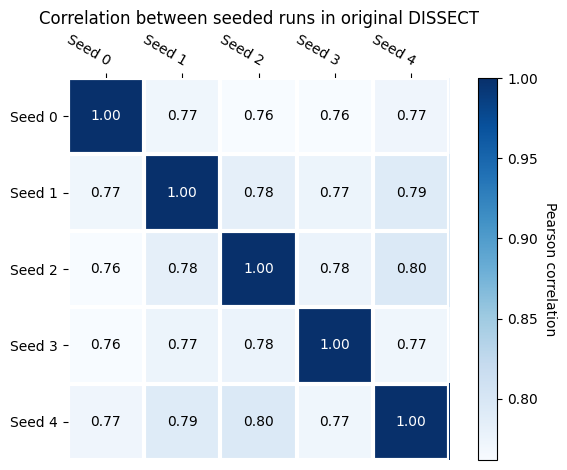

In [20]:
fig, ax = plt.subplots()

im, cbar = heatmap(all_corrs, labels, labels, ax=ax,
                   cmap="Blues", cbarlabel="Pearson correlation")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
ax.set_title("Correlation between seeded runs in original DISSECT")

fig.tight_layout()
plt.savefig("../figures/corr_heatmap_dissect_original.png", dpi=200, bbox_inches="tight")
plt.show()

### Comparison with new implementation

In [21]:
new_corrs = []
for df in results_per_seed:
    new_corrs.append(calc_mean_corr_df(df, new_result)[0])
new_corrs = np.reshape(new_corrs, (5, 1))

Correlation Astro: 0.7829295111035786
Correlation CR: 0.5046702606232595
Correlation Endo: 0.7303867390362091
Correlation L23 IT: 0.9438842047794813
Correlation L4: 0.9289045252781437
Correlation L5 IT: 0.9111345871166063
Correlation L5 PT: 0.8207363032850049
Correlation L6 CT: 0.8925481341907915
Correlation L6 IT: 0.8772735639410768
Correlation L6b: 0.8941296326068341
Correlation Lamp5_celltype: 0.46329051334738475
Correlation Macrophage: 0.6778924583460247
Correlation Meis2_celltype: 0.9393841306014912
Correlation NP: 0.5713011061867264
Correlation Oligo: 0.942006712539065
Correlation Peri: 0.6824042315019802
Correlation Pvalb_celltype: 0.726606103296577
Correlation SMC: 0.740382972152663
Correlation Serpinf1_celltype: 0.509792080552167
Correlation Sncg_celltype: 0.6354110482644686
Correlation Sst_celltype: 0.8196534342402382
Correlation VLMC: 0.9340361911839101
Correlation Vip_celltype: 0.6030439803323157
Mean Correlation: 0.7622522793263479
Correlation Astro: 0.7586144104213784
Cor

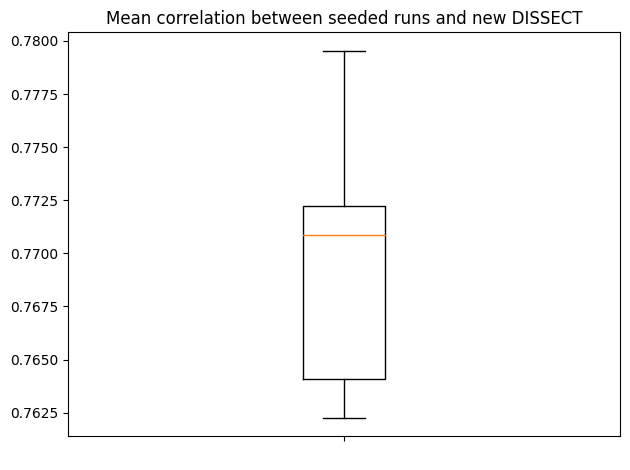

In [23]:
fig, ax = plt.subplots()
ax.boxplot(new_corrs)
ax.set_xticklabels(" ")
ax.set_title("Mean correlation between seeded runs and new DISSECT")
fig.tight_layout()
plt.savefig("../figures/corr_dissect_new_vs_old.png", dpi=200, bbox_inches="tight")
plt.show()

In [41]:
print(np.mean(new_corrs))
print(np.std(new_corrs))
print(np.max(new_corrs))
print(np.min(new_corrs))

0.7697930800777323
0.006191473277842564
0.7795420567646809
0.7622522793263479
